In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/계량/BM_week_인공위성.csv')
df.columns = ['date', 'BM_price', 'BM_rate', 'UFO_price', 'AMZN_price', 'PPA_price',
              'MS_price', 'ITA_price']
df.head()

,date,BM_price,BM_rate,UFO_price,AMZN_price,PPA_price,MS_price,ITA_price
0,2020.11.1,35406,0.015887,22.16,165.57,57.86,223.72,80.74
1,2020.11.8,35973,0.035662,23.70,156.44,63.23,216.51,89.37
2,2020.11.15,37279,0.018972,24.16,154.97,64.22,210.39,91.07
3,2020.11.22,37993,-0.031605,25.05,159.77,66.37,215.23,94.67
4,2020.11.29,36811,0.048983,25.62,158.13,67.80,214.36,96.60


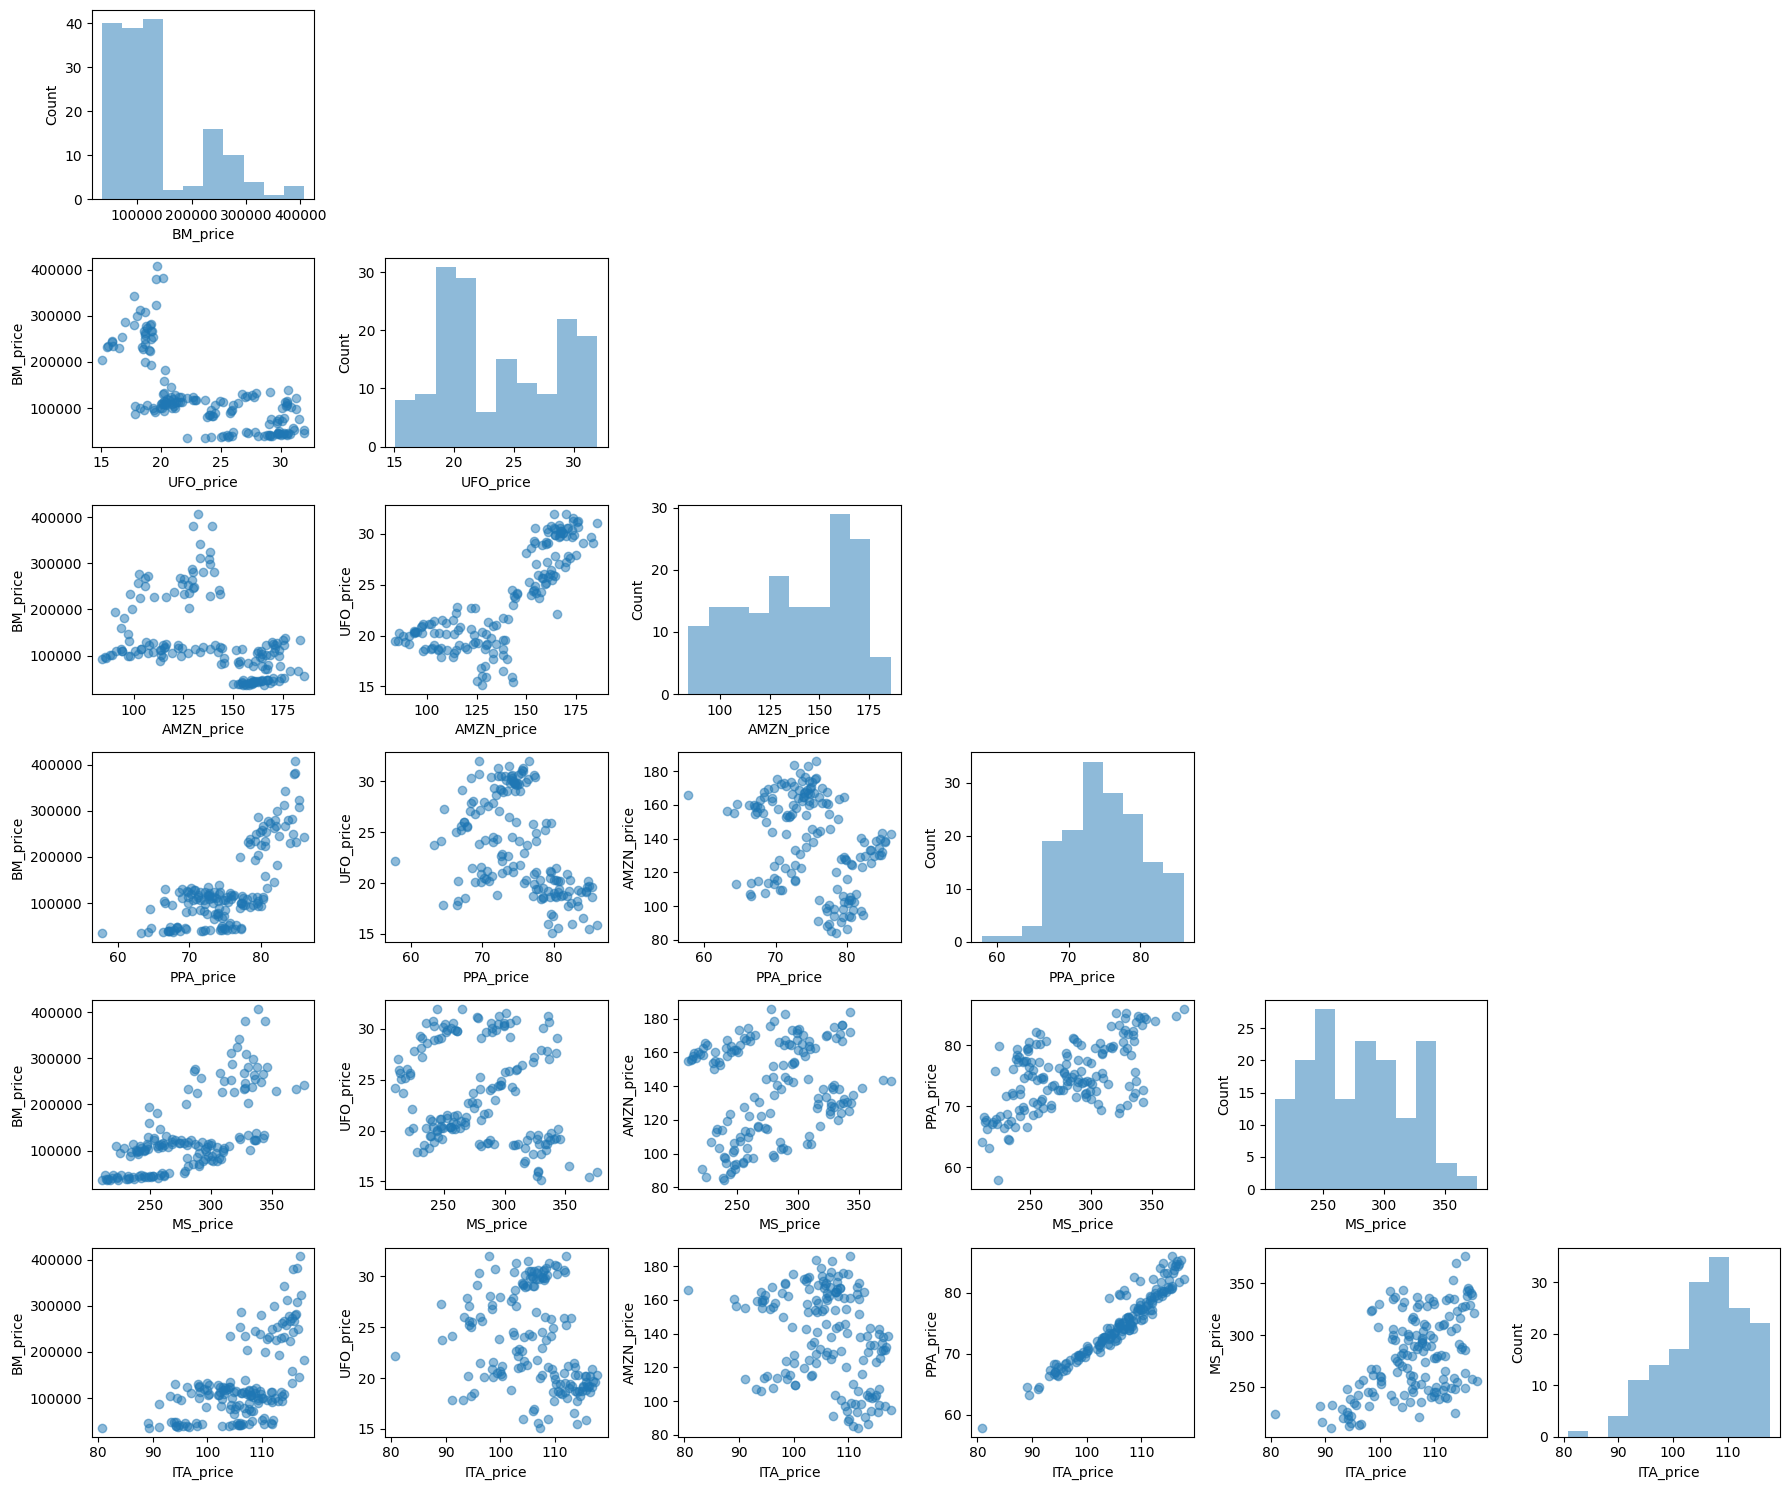

In [ ]:
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
cols = ['BM_price', 'UFO_price', 'AMZN_price', 'PPA_price',
              'MS_price', 'ITA_price']
scatterplotmatrix(df[cols].values, figsize=(18,15), names=cols, alpha=0.5)
plt.tight_layout()
plt.show()

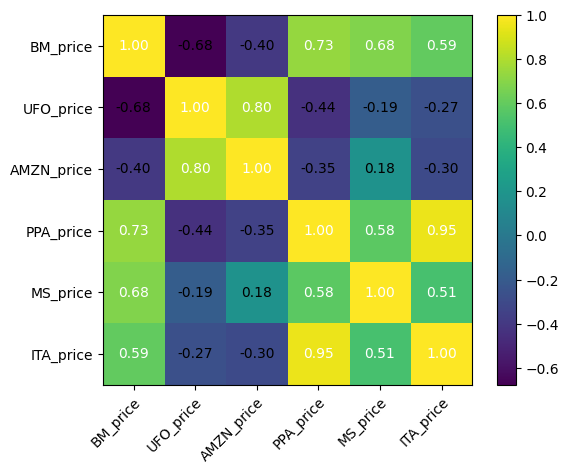

In [ ]:
from mlxtend.plotting import heatmap
import numpy as np
cm = np.corrcoef(df[cols].values.T)
hm = heatmap(cm, row_names=cols, column_names=cols)
plt.show()

In [ ]:
from sklearn.utils import shuffle
# Gradient Descent

class LinearRegressionGD(object):

  def __init__(self, eta=0.0001, n_iter=20):
    self.eta = eta
    self.n_iter = n_iter

  def fit(self, X, y):
    self.w_ = np.zeros(1 + X.shape[1])
    self.cost_ = []

    for i in range(self.n_iter):
      output = self.net_input(X)
      errors = (y - output)
      self.w_[1:] += self.eta * X.T.dot(errors)
      self.w_[0] += self.eta * errors.sum()
      cost = (errors**2).sum() / 2.0
      self.cost_.append(cost)
    return self

  def net_input(self, X):
    return np.dot(X, self.w_[1:] + self.w_[0])

  def predict(self, X):
    return self.net_input(X)

In [ ]:
X = df['BM_price'].values
y = df['MS_price'].values
X = X.reshape(-1, 1)

from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_x.fit_transform(y[:, np.newaxis]).flatten()
lr = LinearRegressionGD()
lr.fit(X_std, y_std)

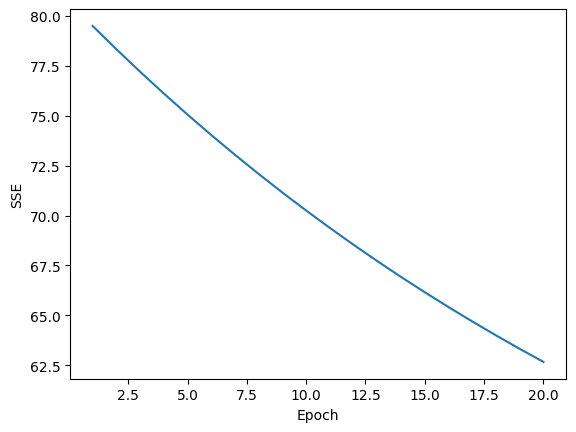

In [ ]:
plt.plot(range(1, lr.n_iter+1), lr.cost_)
plt.ylabel('SSE')
plt.xlabel('Epoch')
plt.tight_layout
plt.show()

In [ ]:
def lin_regplot(X, y, model):
  plt.scatter(X, y, c='steelblue', edgecolors='white', s=70)
  plt.plot(X, model.predict(X), color='black', lw=2)
  return None

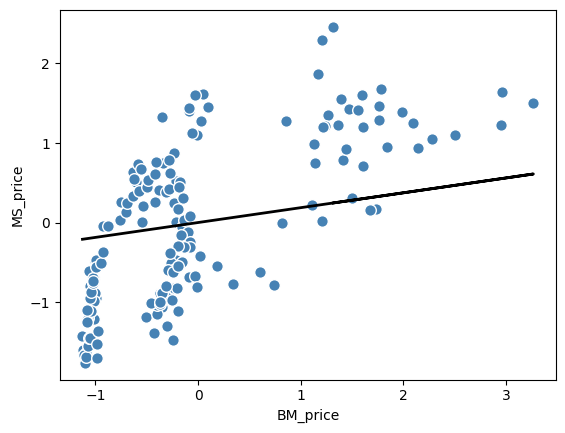

In [ ]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('BM_price')
plt.ylabel('MS_price')
plt.show()

In [ ]:
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression
ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100,
                         min_samples=50,
                         loss='absolute_error',
                         residual_threshold=5.0,
                         random_state=0)
ransac.fit(X,y)

RANSACRegressor(estimator=LinearRegression(), min_samples=50, random_state=0,
                residual_threshold=5.0)

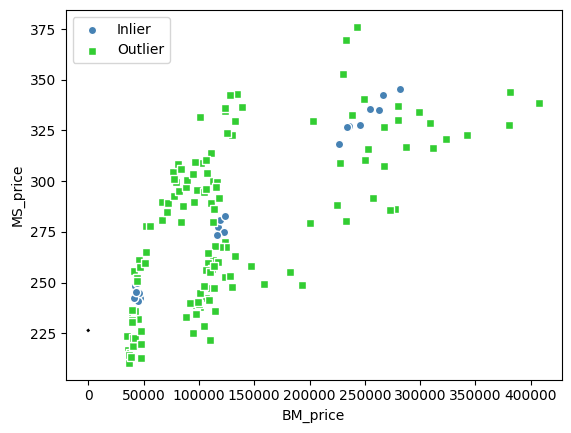

In [ ]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
line_X = np.arange(3, 10, 1)
line_y_ransac = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], c='steelblue', edgecolors='white',
            marker='o', label='Inlier')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', edgecolors='white',
            marker='s', label='Outlier')
plt.plot(line_X, line_y_ransac, color='black', lw=2)
plt.xlabel('BM_price')
plt.ylabel('MS_price')
plt.legend(loc='upper left')
plt.show()